In [1]:
%pip install matplotlib numpy ipywidgets ipympl opencv-python

from os import path
import urllib.request
if not path.exists('imgs.zip'):
    urllib.request.urlretrieve('https://ipfs.io/ipfs/QmRpPpyCuisp9VzhgDV9CdmwmDi5PRAr4kAL6c7UgtHZmg?filename=imgs.zip', 'imgs.zip')

import zipfile
if not path.isdir('imgs'):
    with zipfile.ZipFile('./imgs.zip', 'r') as zip_ref:
        zip_ref.extractall('.')

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyrsistent!=0.17.0,!=0.17.1,!=0.17.2,>=0.14.0 in c:\users\alex\appdata\local\programs\python\python39\lib\site-packages (from jsonschema!=2.5.0,>=2.4->nbformat->notebook>=4.4.1->widgetsnbextension~=3.6.0->ipywidgets) (0.18.0)


[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: C:\users\alex\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import ipywidgets as widgets
import logging
import cv2
import PIL
from time import time

%matplotlib widget

log = logging.getLogger(__name__)
log.setLevel('DEBUG')

yeet 0.0
[]


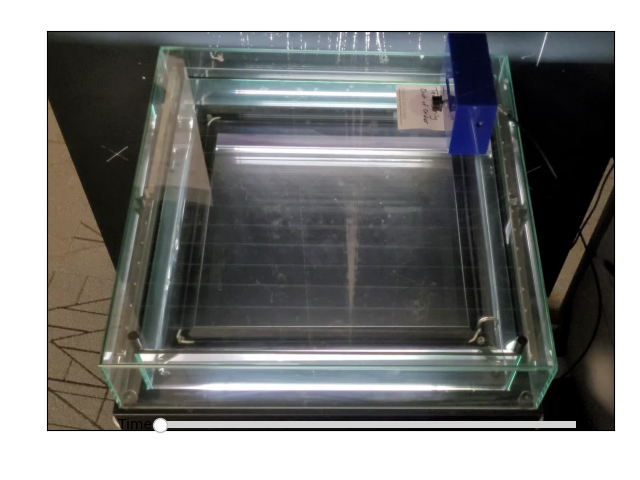

In [9]:
out = widgets.Output()

DECAY_DURATION = 2.5
DURATION = 243  # seconds

class Video():

    def __init__(self, framerate: float = 60, frame: int = 0):
        self.decays = []
        self.framerate = framerate
        self.frame = frame
        
    @property
    def decay_frames(self):
        return DECAY_DURATION*self.framerate

    def get_visible_decays(self):
        visible_decays = filter(lambda d: 0 <= (self.frame - d.frame) < self.decay_frames, self.decays)

        return visible_decays

class Decay():

    def __init__(self, frame, x, y):
        self.x = x
        self.y = y
        self.frame = frame

    def __str__(self):
        return f'<Decay on frame {self.frame} at ({self.x}, {self.y})>'

    def visible_on_frame(self, video):
        diff = video.frame - self.frame
        decay_frame_length = DECAY_DURATION * video.framerate
        return diff < decay_frame_length and diff >= 0

vid = Video(framerate=16)

global last_frame
last_frame = 0
global img
def update():
    fig = plt.gcf()
    ax = plt.gca()
    fig.clear()
    global last_frame
    global img

    
    xs = []
    ys = []
    alphas = []
    
    t1 = time()
    visible_decays = vid.get_visible_decays()
    for d in visible_decays:
        xs.append(d.x)
        ys.append(d.y)
        alphas.append(1 - ((vid.frame - d.frame) / vid.decay_frames))
    t2 = time()
    print(f'yeet {t2-t1}')
    

    # alphas = [(1 - (vid.frame - d.frame) / DECAY_DURATION) for d in visible_decays]
    
    if last_frame != vid.frame or vid.frame == 0:
        img = PIL.Image.open(f'imgs/out{vid.frame+1}.jpg')
    
    # amount_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    # cap.set(cv2.CAP_PROP_POS_FRAMES, vid.frame) # this is slow! up to 1s
    # res, img = cap.read()
    
    plt.imshow(img)
    print(alphas)
    
    if xs:
        plt.scatter(xs, ys, alpha=alphas, color='r')
        
    fig = plt.gcf()
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    slider_ax = plt.axes([0.25, 0.1, 0.65, 0.03])
    time_slider = Slider(
        ax=slider_ax,
        label='Time',
        valmin=0,
        valmax=6338,
        valinit=vid.frame,
        )
    
    last_frame = vid.frame
    
global clicks
clicks = 0
def click_handler(event):
    if event.button == 1 and event.xdata:  # left-button
        global clicks
        clicks += 1
        decay = Decay(vid.frame, event.xdata, event.ydata)
        vid.decays.append(decay)
        log.warning(f'click! {clicks}')
        update()

def key_handler(event):
    if event.key == 'left':
        vid.frame -= vid.framerate
    elif event.key == 'right':
        vid.frame += vid.framerate
    elif event.key == 'k':
        vid.frame -= vid.framerate//4
    elif event.key == 'l':
        vid.frame += vid.framerate//4
    elif event.key == ',':
        vid.frame -= 1
    elif event.key == '.':
        vid.frame += 1
    elif event.key == 'z' and vid.decays:
        clicks =- 1
        vid.decays.pop()
        
    if vid.frame > 6337:
        vid.frame = 6337
    elif vid.frame < 0:
        vid.frame = 0
        
    update()
    with out:
        print('you pressed', event.key, event.xdata, event.ydata)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
fig.tight_layout()
fig.set_dpi(200)

click_cid = fig.canvas.mpl_connect('button_press_event', click_handler)
key_cid = fig.canvas.mpl_connect('key_press_event', key_handler)

update()
plt.show()

In [7]:
print(f'There were {len(vid.decays)} radon particles emitted')
for decay in vid.decays:
    plt.close()
    decay_frames = np.array([d.frame for d in vid.decays])
    plt.hist([d.frame/vid.framerate for d in vid.decays])
    plt.xlabel('Time after rason release (s)')
    plt.ylabel('Number of Radon Decays')

There were 0 radon particles emitted


In [5]:
print(vid.decays)
print([d.frame/vid.framerate for d in vid.decays])

[]
[]
